<a href="https://colab.research.google.com/github/Shivam12-03/finance-project/blob/main/site/en/guide/variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to Variables

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/variable"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/variable.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/guide/variable.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/variable.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

A TensorFlow **variable** is the recommended way to represent shared, persistent state your program manipulates. This guide covers how to create, update, and manage instances of `tf.Variable` in TensorFlow.

Variables are created and tracked via the `tf.Variable` class. A `tf.Variable` represents a tensor whose value can be changed by running ops on it.  Specific ops allow you to read and modify the values of this tensor. Higher level libraries like `tf.keras` use `tf.Variable` to store model parameters.

## Setup

This notebook discusses variable placement.  If you want to see on what device your variables are placed, uncomment this line.

## Create a variable

To create a variable, provide an initial value.  The `tf.Variable` will have the same `dtype` as the initialization value.

A variable looks and acts like a tensor, and, in fact, is a data structure backed by a `tf.Tensor`.  Like tensors, they have a `dtype` and a shape, and can be exported to NumPy.

Most tensor operations work on variables as expected, although variables cannot be reshaped.

As noted above, variables are backed by tensors. You can reassign the tensor using `tf.Variable.assign`.  Calling `assign` does not (usually) allocate a new tensor; instead, the existing tensor's memory is reused.

If you use a variable like a tensor in operations, you will usually operate on the backing tensor.  

Creating new variables from existing variables duplicates the backing tensors. Two variables will not share the same memory.

## Lifecycles, naming, and watching

In Python-based TensorFlow, `tf.Variable` instance have the same lifecycle as other Python objects. When there are no references to a variable it is automatically deallocated.

Variables can also be named which can help you track and debug them.  You can give two variables the same name.

Variable names are preserved when saving and loading models. By default, variables in models will acquire unique variable names automatically, so you don't need to assign them yourself unless you want to.

Although variables are important for differentiation, some variables will not need to be differentiated.  You can turn off gradients for a variable by setting `trainable` to false at creation. An example of a variable that would not need gradients is a training step counter.

## Placing variables and tensors

For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible with its `dtype`.  This means most variables are placed on a GPU if one is available.

However, you can override this.  In this snippet, place a float tensor and a variable on the CPU, even if a GPU is available.  By turning on device placement logging (see [Setup](#scrollTo=xZoJJ4vdvTrD)), you can see where the variable is placed.

Note: Although manual placement works, using [distribution strategies](distributed_training.ipynb) can be a more convenient and scalable way to optimize your computation.

If you run this notebook on different backends with and without a GPU you will see different logging.  *Note that logging device placement must be turned on at the start of the session.*

It's possible to set the location of a variable or tensor on one device and do the computation on another device.  This will introduce delay, as data needs to be copied between the devices.

You might do this, however, if you had multiple GPU workers but only want one copy of the variables.

Note: Because `tf.config.set_soft_device_placement` is turned on by default, even if you run this code on a device without a GPU, it will still run.  The multiplication step will happen on the CPU.

For more on distributed training, refer to the [guide](distributed_training.ipynb).

## Next steps

To understand how variables are typically used, see our guide on [automatic differentiation](autodiff.ipynb).

In [13]:
pip install yfinance pandas matplotlib openpyxl


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker       ZOMATO.NS   ZOMATO.NS   ZOMATO.NS   ZOMATO.NS  ZOMATO.NS
Date                                                                 
2021-07-23  126.000000  138.899994  115.000000  116.000000  694895290
2021-07-26  140.649994  143.750000  125.300003  126.349998  249723854
2021-07-27  132.899994  147.800003  127.750000  141.699997  240341900
2021-07-28  131.199997  135.000000  123.550003  131.000000  159793731
2021-07-29  141.550003  144.000000  132.199997  134.949997  117973089
...                ...         ...         ...         ...        ...
2025-01-22  216.449997  218.199997  203.850006  207.149994  178256196
2025-01-23  221.949997  223.449997  216.449997  219.649994   75649874
2025-01-24  215.600006  221.000000  214.600006  221.000000   43901547
2025-01-27  206.199997  213.000000  205.500000  213.000000   55203993
2025-01-28  208.199997  211.750000  205.600006  206.250000   54426157

[870 rows x 5 colum

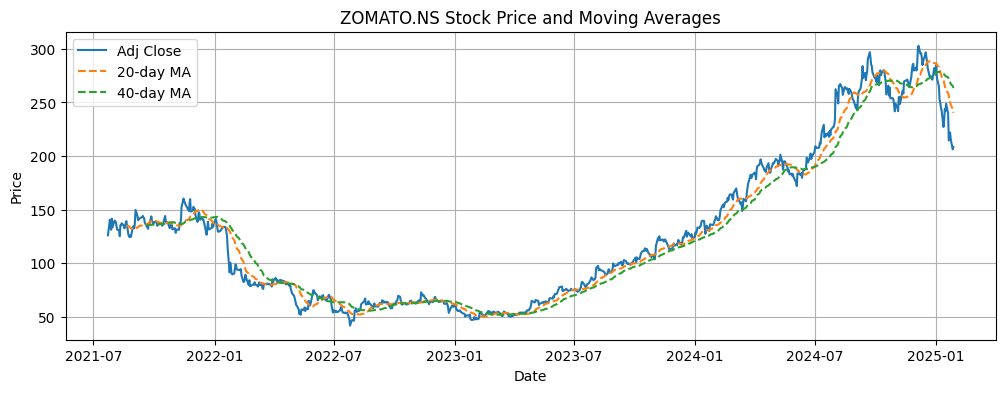

Ticker      2021-08-12 00:00:00  ZOMATO.NS
Date                                      
2025-01-22                  NaN  31.131895
2025-01-23                  NaN  34.674943
2025-01-24                  NaN  32.600252
2025-01-27                  NaN  29.774698
2025-01-28                  NaN  31.135340


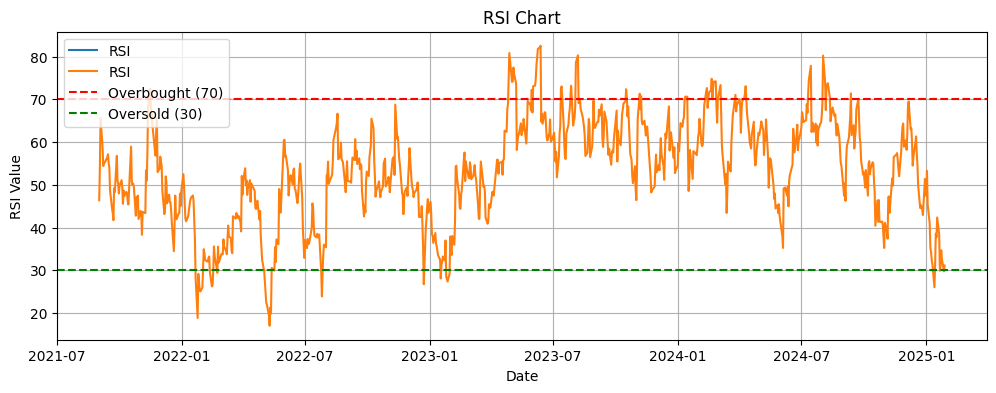

In [5]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for ZOMATO
ticker = "ZOMATO.NS"  # For NSE
# ticker = "TTM"  # For NYSE

# Download historical stock data
data = yf.download(ticker, start="2021-01-01", end="2025-01-29")

# Print the data
print(data)

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib for plotting

def analyze_data(stock_data):
    # Check if 'Adj Close' column exists. If not, use 'Close'
    if 'Adj Close' in stock_data.columns:
        close_col = 'Adj Close'
    else:
        print("Warning: 'Adj Close' column not found. Using 'Close' instead.")
        close_col = 'Close'  # Use 'Close' column if 'Adj Close' is not present

    stock_data['Daily Return'] = stock_data[close_col].pct_change()
    stock_data['20-day MA'] = stock_data[close_col].rolling(window=20).mean()
    stock_data['40-day MA'] = stock_data[close_col].rolling(window=40).mean()
    return stock_data

def plot_data(stock_data, ticker):
    plt.figure(figsize=(12, 4))
    # Check if 'Adj Close' exists; if not, use 'Close'
    plt.plot(stock_data['Adj Close'] if 'Adj Close' in stock_data.columns else stock_data['Close'], label='Adj Close')
    plt.plot(stock_data['20-day MA'], label='20-day MA', linestyle='--')
    plt.plot(stock_data['40-day MA'], label='40-day MA', linestyle='--')
    plt.title(f'{ticker} Stock Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

close_column = "Adj Close" if "Adj Close" in data.columns else "Close"
# print(close_column)
# print(close_column[[close_column, "Daily Return", "20-day MA","40-day MA"]].tail())
moving_avg = analyze_data(data)
print(moving_avg)
plot_data(moving_avg, ticker)
import numpy as np

def rsi(df, n, close_col):  # Add close_col as argument
    delta = df[close_col].diff().dropna() # Use close_col here
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[n - 1]] = np.mean(u[:n])  # first value is sum of avg gains
    u = u.drop(u.index[:(n - 1)])
    rs = u.ewm(com=n, min_periods=n).mean() / d.ewm(com=n, min_periods=n).mean()
    rsi_values = 100 - (100 / (1 + rs)) # Assign RSI values to a variable

    # Print the RSI values
    print(rsi_values.tail())

    return rsi_values # Return the calculated RSI values

rsi_data = rsi(data, 14, close_column) # Pass data, n, and close_column

plt.figure(figsize=(12, 4))
plt.plot(rsi_data.index, rsi_data, label='RSI')
plt.title('RSI Chart')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.legend()
plt.grid(True)
plt.show()
